In [1]:
#Install nltk
#!conda install -c anaconda nltk
import nltk
#nltk.download ()

#https://pythonspot-9329.kxcdn.com/wp-content/uploads/2016/08/nltk-speech-codes.png
#https://pythonspot-9329.kxcdn.com/wp-content/uploads/2016/08/nltk-speech-codes.png

import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import pickle
import numpy as np


#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *

%matplotlib inline
#Install nltk
#!conda install -c anaconda nltk
import nltk
#nltk.download ()

#https://pythonspot-9329.kxcdn.com/wp-content/uploads/2016/08/nltk-speech-codes.png
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string

class TextAnalysis:
    def __init__(self):
        pass
    
    def get_df(self):
        return self.df
    
    def preprocess_df (self, df):
        self.df = df 
        self.messages = self.df.message.fillna(' ')
        self.preprocess()
        
        
    def top_words(self, n):
        allwords = []
        ignore_list = ['thefaceshop', "'s", 'singapore', '*t', 'yehwadam', 'dr.', 'us', 'thefaceshop-nature']
        stop_words = set(stopwords.words('english'))
        for i in ignore_list:
            stop_words.add(i)

        for m in self.messages:
            words = nltk.word_tokenize(m)
            # Remove single-character tokens (mostly punctuation)
            words = [word for word in words if len(word) > 1]
            # Remove numbers
            words = [word for word in words if not word.isnumeric()]
            # Lowercase all words (default_stopwords are lowercase too)
            words = [word.lower() for word in words]
            # Remove stopwords
            words = [w for w in words if not w in stop_words]
            allwords = allwords + words
#            print(nltk.FreqDist(words))
#             for word, frequency in nltk.FreqDist(words).most_common(n):
#                 print(u'{};{}'.format(word, frequency))


        # Calculate frequency distribution
        fdist = nltk.FreqDist(allwords)
        # Output top 50 words
        return fdist.most_common(n)

        
    def preprocess (self):
        self.m = []
        self.noun = []
        self.adjective = []
        self.verb = []

        #Remove puncuations
        for m in self.messages:
            tokenizer = RegexpTokenizer(r'\w+')
            words = tokenizer.tokenize(m)

            stop_words = set(stopwords.words('english'))
            words = [w for w in words if not w in stop_words]

            msg = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in words]).strip()

            self.m.append(msg)
            data = nltk.pos_tag(msg)
            noun = 0
            adjective = 0
            verb = 0 
            for word in data: 
                if 'NN' in word[1]: 
                    noun += 1
                else:
                    if 'JJ' in word[1]: 
                        adjective += 1
                    else:
                        if 'VB' in word[1]:
                            verb += 1
            self.noun.append(noun)
            self.adjective.append(adjective)
            self.verb.append(verb)
            
        df_features = pd.DataFrame()
        df_features['MsgSize'] = [len(i) for i in self.messages]
        df_features['engag'] = self.df.engagements #/df_features['MsgSize']
        df_features['Noun'] = self.noun #/df_features['MsgSize']
        df_features['Adj'] = self.adjective #/df_features['MsgSize']
        df_features['Verb'] = self.verb #/df_features['MsgSize']


        self.df_features = df_features
        print(self.df_features.shape)
#        self.df = []
#        self.messages = []
#        print(self.m, ' ', self.noun, ' ', self.adjective, ' ', verb)



# ta = TextAnalysis('posts.json')
# ta.preprocess()
# ta.df_features.head()

Cores:  12


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/uqapp/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))


Done.


In [2]:
m = 'thefaceshop is in the singapore'
ignore_list = ['thefaceshop', "'s", 'singapore' ]
     
words = nltk.word_tokenize(m)
            # Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1 and word not in ignore_list]
print(words)

['is', 'in', 'the']


In [3]:
url = 'posts.json'
df = pd.read_json(url, orient='columns')

delete_rows = df[df['message'].isna()].index
df.drop(index=delete_rows, inplace=True)


ta = TextAnalysis()
df['click_rate'] = df['clicks_unique'] / (df['impressions_organic_unique'] + df['impressions_paid_unique'])
df['reaction_rate'] = (df['reactions_haha'] + df['reactions_like'] + df['reactions_love'] + df['reactions_sorry']) / (df['impressions_organic_unique'] + df['impressions_paid_unique'])
df['engagement_rate'] = df['engagements'] / (df['impressions_organic_unique'] + df['impressions_paid_unique'])
df['comment_rate'] = df['comments'] / (df['impressions_organic_unique'] + df['impressions_paid_unique'])
df['shares'] = df['comments'] / (df['impressions_organic_unique'] + df['impressions_paid_unique'])


delete_rows = df[df['comment_rate'].isna()].index
df.drop(index=delete_rows, inplace=True)
print(df.shape)
ta.preprocess_df(df)
ta.df_features.head()
df = ta.get_df()
print(df.shape)


fdist = ta.top_words(20)
for word, frequency in fdist:
    print(u'{};{}'.format(word, frequency))







(701, 34)


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/uqapp/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


(701, 5)
(701, 34)
skin;239
collection;176
day;172
enjoy;161
stores;138
purchase;127
till;125
new;124
worth;117
get;115
belmeur;110
available;107
today;103
outlets;100
makeup;100
products;99
receive;95
applies;95
win;91
cushion;91


import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

df = ta.df_features[['engag','MsgSize','Noun','Adj','Verb']]
df.info()

fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.1f')

In [4]:
df.info()
delete_rows = df[df['message'].isna()].index
df.drop(index=delete_rows, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 707
Data columns (total 34 columns):
amplification                    701 non-null object
clicks                           701 non-null int64
clicks_unique                    701 non-null int64
comments                         701 non-null int64
created_time                     701 non-null datetime64[ns]
engagements                      701 non-null int64
id                               701 non-null float64
impressions                      701 non-null int64
impressions_organic              701 non-null int64
impressions_organic_unique       701 non-null int64
impressions_paid                 701 non-null int64
impressions_paid_unique          701 non-null int64
intent                           701 non-null object
is_sharing_required_for_promo    701 non-null bool
last_post_time_diff              701 non-null int64
media_src_url                    701 non-null object
media_url                        701 non-null obje

In [70]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.optimizers import RMSprop, Adam, Adagrad


# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
#message

docs = df['message'].values
# print(docs)
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
labels = df['shares']

# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
# print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1))
# compile the model
#optimizer = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
optimizer = Adam(1e-3)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
# summarize the model
#print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=100, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

KeyError: 'message'

In [86]:
from keras.models import Sequential, Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad
from sklearn.preprocessing import StandardScaler


first_input = Input(shape=(max_length, ))
first_dense = Embedding(vocab_size, 8)(first_input)
first_flattened = Flatten()(first_dense)


#X = ta.df_features[['MsgSize','Noun','Adj','Verb']]

cols_to_encode = ['amplification', 'intent', 'type']
encoders = {}

for i in range(0, len(cols_to_encode)):
    col = cols_to_encode[i]
    encoders[col] = LabelEncoder()
    df[col + '_encoded'] = encoders[col].fit_transform(df[col])

features = [
    'amplification_encoded', 
#    'intent_encoded', 
    'type_encoded', 
#     'last_post_time_diff',
#    'time', 
    'weekday',
#    'num_creatives',
    'message_length',
#    'MsgSize','Noun','Adj','Verb'
]
X = df[features]
# X['Noun'] = ta.df_features['Noun']
# X['Adj'] = ta.df_features['Adj']
# X['Verb'] = ta.df_features['Verb']


scaler = StandardScaler()
scaler.fit(X)
Z_train = scaler.transform(X)
#Z_test = scaler.transform(X_test)


second_input = Input(shape=(Z_train.shape[1], ))
second_dense = Dense(1)(second_input)

merge_one = concatenate([first_flattened, second_dense])
third_dense = Dense(7, activation='relu')(merge_one)
output = Dense(1)(third_dense)


model = Model(inputs=[first_input, second_input], outputs=output)
optimizer = Adam(1e-4)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 4)            0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 4, 8)         400         input_23[0][0]                   
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 4)            0                                            
__________________________________________________________________________________________________
flatten_13 (Flatten)            (None, 32)           0           embedding_13[0][0]               
__________________________________________________________________________________________________
dense_35 (

/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/ipykernel_launcher.py:41: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [87]:
model.fit([padded_docs, Z_train], labels, epochs=500, verbose=1)




Epoch 1/500
701/701 [==============================] - 1s 1ms/step - loss: 0.1450 - mean_absolute_error: 0.1450
Epoch 2/500
701/701 [==============================] - 0s 68us/step - loss: 0.1355 - mean_absolute_error: 0.1355
Epoch 3/500
701/701 [==============================] - 0s 61us/step - loss: 0.1261 - mean_absolute_error: 0.1261
Epoch 4/500
701/701 [==============================] - 0s 101us/step - loss: 0.1172 - mean_absolute_error: 0.1172
Epoch 5/500
701/701 [==============================] - 0s 70us/step - loss: 0.1087 - mean_absolute_error: 0.1087
Epoch 6/500
701/701 [==============================] - 0s 63us/step - loss: 0.1008 - mean_absolute_error: 0.1008
Epoch 7/500
701/701 [==============================] - 0s 67us/step - loss: 0.0933 - mean_absolute_error: 0.0933
Epoch 8/500
701/701 [==============================] - 0s 67us/step - loss: 0.0863 - mean_absolute_error: 0.0863
Epoch 9/500
701/701 [==============================] - 0s 62us/step - loss: 0.0798 - mean_absolu

701/701 [==============================] - 0s 64us/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 73/500
701/701 [==============================] - 0s 66us/step - loss: 0.0110 - mean_absolute_error: 0.0110
Epoch 74/500
701/701 [==============================] - 0s 62us/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 75/500
701/701 [==============================] - 0s 60us/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 76/500
701/701 [==============================] - 0s 63us/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 77/500
701/701 [==============================] - 0s 67us/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 78/500
701/701 [==============================] - 0s 63us/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 79/500
701/701 [==============================] - 0s 59us/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 80/500
701/701 [==============================] - 0s 72us/step - loss: 0.0095 - mean_absolute_e

701/701 [==============================] - 0s 57us/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 144/500
701/701 [==============================] - 0s 64us/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 145/500
701/701 [==============================] - 0s 63us/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 146/500
701/701 [==============================] - 0s 51us/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 147/500
701/701 [==============================] - 0s 47us/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 148/500
701/701 [==============================] - 0s 49us/step - loss: 0.0024 - mean_absolute_error: 0.0024   
Epoch 149/500
701/701 [==============================] - 0s 55us/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 150/500
701/701 [==============================] - 0s 66us/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 151/500
701/701 [==============================] - 0s 65us/step - loss: 0.0023 - mean

Epoch 214/500
701/701 [==============================] - 0s 64us/step - loss: 0.0013 - mean_absolute_error: 0.0013   
Epoch 215/500
701/701 [==============================] - 0s 55us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 216/500
701/701 [==============================] - 0s 61us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 217/500
701/701 [==============================] - 0s 74us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 218/500
701/701 [==============================] - 0s 59us/step - loss: 0.0013 - mean_absolute_error: 0.0013   
Epoch 219/500
701/701 [==============================] - 0s 68us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 220/500
701/701 [==============================] - 0s 64us/step - loss: 0.0013 - mean_absolute_error: 0.0013   
Epoch 221/500
701/701 [==============================] - 0s 59us/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 222/500
701/701 [==============================] - 0s 70us/step -

701/701 [==============================] - 0s 70us/step - loss: 0.0011 - mean_absolute_error: 0.0011   
Epoch 285/500
701/701 [==============================] - 0s 63us/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 286/500
701/701 [==============================] - 0s 70us/step - loss: 0.0011 - mean_absolute_error: 0.0011   
Epoch 287/500
701/701 [==============================] - 0s 63us/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 288/500
701/701 [==============================] - 0s 59us/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 289/500
701/701 [==============================] - 0s 64us/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 290/500
701/701 [==============================] - 0s 66us/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 291/500
701/701 [==============================] - 0s 66us/step - loss: 0.0010 - mean_absolute_error: 0.0010   
Epoch 292/500
701/701 [==============================] - 0s 67us/step - loss: 0.0010 

701/701 [==============================] - 0s 59us/step - loss: 9.7435e-04 - mean_absolute_error: 9.7435e-04
Epoch 353/500
701/701 [==============================] - 0s 54us/step - loss: 9.7793e-04 - mean_absolute_error: 9.7793e-04
Epoch 354/500
701/701 [==============================] - 0s 61us/step - loss: 9.7108e-04 - mean_absolute_error: 9.7108e-04
Epoch 355/500
701/701 [==============================] - 0s 53us/step - loss: 9.6367e-04 - mean_absolute_error: 9.6367e-04
Epoch 356/500
701/701 [==============================] - 0s 47us/step - loss: 9.6337e-04 - mean_absolute_error: 9.6337e-04
Epoch 357/500
701/701 [==============================] - 0s 48us/step - loss: 9.4798e-04 - mean_absolute_error: 9.4798e-04
Epoch 358/500
701/701 [==============================] - 0s 63us/step - loss: 9.6495e-04 - mean_absolute_error: 9.6495e-04
Epoch 359/500
701/701 [==============================] - 0s 65us/step - loss: 9.5109e-04 - mean_absolute_error: 9.5109e-04
Epoch 360/500
701/701 [=======

701/701 [==============================] - 0s 59us/step - loss: 9.4227e-04 - mean_absolute_error: 9.4227e-04
Epoch 419/500
701/701 [==============================] - 0s 63us/step - loss: 9.3092e-04 - mean_absolute_error: 9.3092e-04
Epoch 420/500
701/701 [==============================] - 0s 67us/step - loss: 9.1560e-04 - mean_absolute_error: 9.1560e-04
Epoch 421/500
701/701 [==============================] - 0s 54us/step - loss: 9.1672e-04 - mean_absolute_error: 9.1672e-04
Epoch 422/500
701/701 [==============================] - 0s 61us/step - loss: 9.1988e-04 - mean_absolute_error: 9.1988e-04
Epoch 423/500
701/701 [==============================] - 0s 60us/step - loss: 9.2365e-04 - mean_absolute_error: 9.2365e-04
Epoch 424/500
701/701 [==============================] - 0s 56us/step - loss: 9.2057e-04 - mean_absolute_error: 9.2057e-04
Epoch 425/500
701/701 [==============================] - 0s 48us/step - loss: 9.3298e-04 - mean_absolute_error: 9.3298e-04
Epoch 426/500
701/701 [=======

701/701 [==============================] - 0s 67us/step - loss: 8.9274e-04 - mean_absolute_error: 8.9274e-04
Epoch 485/500
701/701 [==============================] - 0s 67us/step - loss: 9.0121e-04 - mean_absolute_error: 9.0121e-04
Epoch 486/500
701/701 [==============================] - 0s 67us/step - loss: 9.0133e-04 - mean_absolute_error: 9.0133e-04
Epoch 487/500
701/701 [==============================] - 0s 71us/step - loss: 8.9184e-04 - mean_absolute_error: 8.9184e-04
Epoch 488/500
701/701 [==============================] - 0s 72us/step - loss: 8.9793e-04 - mean_absolute_error: 8.9793e-04
Epoch 489/500
701/701 [==============================] - 0s 71us/step - loss: 9.0670e-04 - mean_absolute_error: 9.0670e-04
Epoch 490/500
701/701 [==============================] - 0s 68us/step - loss: 9.1217e-04 - mean_absolute_error: 9.1217e-04
Epoch 491/500
701/701 [==============================] - 0s 70us/step - loss: 9.0734e-04 - mean_absolute_error: 9.0734e-04
Epoch 492/500
701/701 [=======

In [59]:
# X = ta.df_features[['MsgSize','Noun','Adj','Verb']]
# y = df['engagement_rate']

# print(X.shape)
# print(y.shape)

#ta.df_features



/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
df.head()
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(2, input_shape=(len(X.columns),), activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1))
model.summary()

from keras.callbacks import TensorBoard
from keras.optimizers import Adam, RMSprop, SGD
import time

#X = ta.df_features[['MsgSize','Noun','Adj','Verb']]
#y = df['engagement_rate']

print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
Z_train = scaler.transform(X_train)
Z_test = scaler.transform(X_test)

optimizer = Adam(lr=1e-3)

batch_size = 128

#tensorboard = TensorBoard(log_dir='./logs/fb_engagement/%d' % time.time())

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________



/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [10]:

epochs = 200

history = model.fit(Z_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[tensorboard],
                    validation_data=(X_test, y_test))



Train on 560 samples, validate on 141 samples
Epoch 1/200
560/560 [==============================] - 1s 1ms/step - loss: 0.2791 - mean_squared_error: 0.2791 - val_loss: 0.4811 - val_mean_squared_error: 0.4811
Epoch 2/200
560/560 [==============================] - 0s 18us/step - loss: 0.2654 - mean_squared_error: 0.2654 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 3/200
560/560 [==============================] - 0s 19us/step - loss: 0.2517 - mean_squared_error: 0.2517 - val_loss: 0.4535 - val_mean_squared_error: 0.4535
Epoch 4/200
560/560 [==============================] - 0s 17us/step - loss: 0.2386 - mean_squared_error: 0.2386 - val_loss: 0.4404 - val_mean_squared_error: 0.4404
Epoch 5/200
560/560 [==============================] - 0s 18us/step - loss: 0.2259 - mean_squared_error: 0.2259 - val_loss: 0.4278 - val_mean_squared_error: 0.4278
Epoch 6/200
560/560 [==============================] - 0s 16us/step - loss: 0.2139 - mean_squared_error: 0.2139 - val_loss: 0.4159 - va

560/560 [==============================] - 0s 17us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Epoch 51/200
560/560 [==============================] - 0s 18us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.2219 - val_mean_squared_error: 0.2219
Epoch 52/200
560/560 [==============================] - 0s 19us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.2212 - val_mean_squared_error: 0.2212
Epoch 53/200
560/560 [==============================] - 0s 18us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.2205 - val_mean_squared_error: 0.2205
Epoch 54/200
560/560 [==============================] - 0s 18us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.2198 - val_mean_squared_error: 0.2198
Epoch 55/200
560/560 [==============================] - 0s 17us/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.2192 - val_mean_squared_error: 0.2192
Epoch 56/200
560/560 [=

Epoch 100/200
560/560 [==============================] - 0s 17us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 101/200
560/560 [==============================] - 0s 16us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 102/200
560/560 [==============================] - 0s 15us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 103/200
560/560 [==============================] - 0s 17us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 104/200
560/560 [==============================] - 0s 16us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 105/200
560/560 [==============================] - 0s 19us/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoc

560/560 [==============================] - 0s 16us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 150/200
560/560 [==============================] - 0s 19us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 151/200
560/560 [==============================] - 0s 17us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 152/200
560/560 [==============================] - 0s 17us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 153/200
560/560 [==============================] - 0s 19us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 154/200
560/560 [==============================] - 0s 17us/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 155/200
560/

560/560 [==============================] - 0s 16us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 199/200
560/560 [==============================] - 0s 14us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 200/200
560/560 [==============================] - 0s 16us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2128 - val_mean_squared_error: 0.2128


In [11]:
import numpy as np
import re

def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words

def extract_words(sentence):
    ignore_words = ['a']
    words = re.sub("[^\w]", " ",  sentence).split() #nltk.word_tokenize(sentence)
    words_cleaned = [w.lower() for w in words if w not in ignore_words]
    return words_cleaned    
    
def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

sentences = ["Machine learning is great","Natural Language Processing is a complex field","Natural Language Processing is used in machine learning"]
vocabulary = tokenize_sentences(sentences)
bagofwords("Machine learning is great", vocabulary)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000) 
train_data_features = vectorizer.fit_transform(sentences)
vectorizer.transform(["Machine learning is great"]).toarray()

<>:15: DeprecationWarning: invalid escape sequence \w
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]])

In [12]:
nans = lambda df: df[df.isnull().any(axis=1)]
#show rows which has nan in any columns
nans(df)

,amplification,clicks,clicks_unique,comments,created_time,engagements,id,impressions,impressions_organic,impressions_organic_unique,...,type,visual_style,weekday,click_rate,reaction_rate,engagement_rate,comment_rate,amplification_encoded,intent_encoded,type_encoded


In [13]:
#list columns with nan
df.columns[df.isna().any()].tolist()


[]

In [14]:
delete_rows = df[df['comment_rate'].isna()].index
df.drop(index=delete_rows, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 707
Data columns (total 37 columns):
amplification                    701 non-null object
clicks                           701 non-null int64
clicks_unique                    701 non-null int64
comments                         701 non-null int64
created_time                     701 non-null datetime64[ns]
engagements                      701 non-null int64
id                               701 non-null float64
impressions                      701 non-null int64
impressions_organic              701 non-null int64
impressions_organic_unique       701 non-null int64
impressions_paid                 701 non-null int64
impressions_paid_unique          701 non-null int64
intent                           701 non-null object
is_sharing_required_for_promo    701 non-null bool
last_post_time_diff              701 non-null int64
media_src_url                    701 non-null object
media_url                        701 non-null obje

In [15]:
#drop message column as we don't need for EDA
df.drop('message', axis=1, inplace=True)

In [16]:
df.describe()

,clicks,clicks_unique,comments,engagements,id,impressions,impressions_organic,impressions_organic_unique,impressions_paid,impressions_paid_unique,...,shares,time,weekday,click_rate,reaction_rate,engagement_rate,comment_rate,amplification_encoded,intent_encoded,type_encoded
count,701.000000,701.000000,701.000000,701.000000,7.010000e+02,701.000000,701.000000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.0,701.000000
mean,417.845934,295.650499,12.506419,373.081312,1.018037e+30,11658.828816,5812.858773,3870.134094,5484.992867,3976.831669,...,0.001296,15.125535,3.069900,0.041784,0.013489,0.053402,0.001296,0.245364,0.0,5.168331
std,1304.849837,899.516147,56.249308,961.471818,1.352855e+29,18648.916344,4961.219590,3241.704994,15408.733443,10558.760205,...,0.005301,2.793603,1.848387,0.172487,0.052757,0.216347,0.005301,0.430610,0.0,2.601136
min,8.000000,8.000000,0.000000,17.000000,1.038028e+29,833.000000,65.000000,47.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002334,0.000445,0.004740,0.000000,0.000000,0.0,0.000000
25%,80.000000,62.000000,0.000000,85.000000,1.038028e+30,4133.000000,3881.000000,2584.000000,0.000000,0.000000,...,0.000000,12.000000,2.000000,0.017987,0.005007,0.026492,0.000000,0.000000,0.0,5.000000
50%,139.000000,103.000000,0.000000,132.000000,1.038028e+30,5371.000000,4781.000000,3235.000000,0.000000,0.000000,...,0.000000,17.000000,3.000000,0.027600,0.008264,0.037674,0.000000,0.000000,0.0,5.000000
75%,339.000000,245.000000,2.000000,316.000000,1.038028e+30,9623.000000,6312.000000,4219.000000,0.000000,0.000000,...,0.000335,17.000000,5.000000,0.043681,0.012305,0.054226,0.000335,0.000000,0.0,5.000000
max,29156.000000,19759.000000,525.000000,20351.000000,1.038028e+30,224257.000000,103937.000000,68701.000000,154171.000000,95368.000000,...,0.042754,22.000000,6.000000,4.425532,1.297872,5.531915,0.042754,1.000000,0.0,10.000000


In [17]:
# Define your own bins
v = 'impressions_paid'
m_bins = range(0, df[v].max(), 10)

_v = '_' + v
                     
# Cut the data with the help of the bins
df[_v] = pd.cut(df[v], bins=m_bins)

# Count the number of values per bucket
df[_v].value_counts()
print('Done')

Done


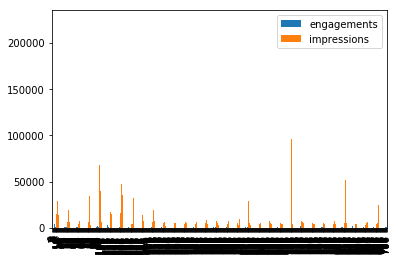

In [18]:
df2 = pd.DataFrame(df[(df['engagements'] > 0) & (df['reactions_like'] > 0)], columns=['engagements', 'impressions'])
df2.plot.bar();

In [19]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

f = [ 'clicks', 'clicks_unique', 'comments', 
       'id', 'impressions', 'impressions_organic',
       'impressions_organic_unique', 'impressions_paid',
       'impressions_paid_unique', 'is_sharing_required_for_promo',
       'last_post_time_diff', 'num_creatives',
       'promotion_amount', 'reactions_haha', 'reactions_like',
       'reactions_love', 'reactions_sorry', 'shares', 'time', 'weekday'
       ]
X = df[f]
print(df[f].info())
Y = df['engagements']
names = f

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 707
Data columns (total 20 columns):
clicks                           701 non-null int64
clicks_unique                    701 non-null int64
comments                         701 non-null int64
id                               701 non-null float64
impressions                      701 non-null int64
impressions_organic              701 non-null int64
impressions_organic_unique       701 non-null int64
impressions_paid                 701 non-null int64
impressions_paid_unique          701 non-null int64
is_sharing_required_for_promo    701 non-null bool
last_post_time_diff              701 non-null int64
num_creatives                    701 non-null int64
promotion_amount                 701 non-null int64
reactions_haha                   701 non-null int64
reactions_like                   701 non-null int64
reactions_love                   701 non-null int64
reactions_sorry                  701 non-null int64
shares    

/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


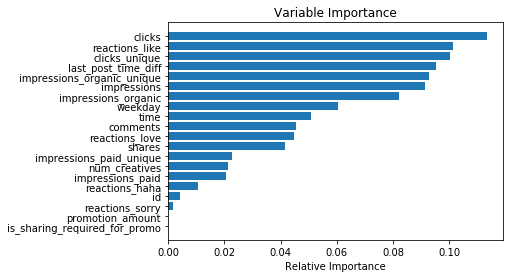

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

padding = np.arange(len(names)) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')
# Customize the plot

plt.yticks(padding, [names[i] for i in sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [21]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=1)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(X)

# Inspect shape of the `reduced_data`
reduced_data.shape

# print out the reduced data
print(reduced_data)

[[-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [ 9.14234379e+29]
 [ 9.14234379e+29]
 [ 9.14234379e+29]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [ 9.14234379e+29]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [ 9.14234379e+29]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [ 9.14234379e+29]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.99905477e+28]
 [-1.9990547

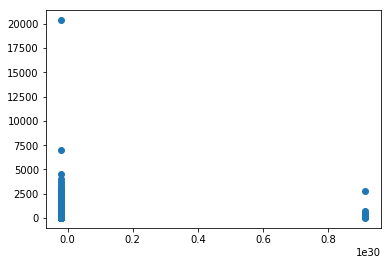

In [22]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:,0], Y)
plt.show()

In [23]:
# Pearson correlation
X.corr()

# Kendall Tau correlation
X.corr('kendall')

# Spearman Rank correlation
X.corr('spearman')

,clicks,clicks_unique,comments,id,impressions,impressions_organic,impressions_organic_unique,impressions_paid,impressions_paid_unique,is_sharing_required_for_promo,last_post_time_diff,num_creatives,promotion_amount,reactions_haha,reactions_like,reactions_love,reactions_sorry,shares,time,weekday
clicks,1.000000,0.991417,0.474829,0.031654,0.712859,0.567127,0.577312,0.546781,0.546296,NaN,0.011389,0.382854,NaN,0.287774,0.620006,0.482480,0.129720,0.364188,0.139164,0.090950
clicks_unique,0.991417,1.000000,0.486671,0.068001,0.742255,0.583135,0.591704,0.576085,0.575699,NaN,0.023985,0.367633,NaN,0.297074,0.627942,0.494978,0.135527,0.372956,0.152183,0.095504
comments,0.474829,0.486671,1.000000,0.085588,0.416394,0.304658,0.309077,0.418069,0.417977,NaN,0.001255,-0.016215,NaN,0.285926,0.545666,0.448840,0.201940,0.963570,0.021915,0.063849
id,0.031654,0.068001,0.085588,1.000000,0.309371,0.244130,0.211955,0.335857,0.332446,NaN,0.224305,0.148194,NaN,0.121752,-0.031626,0.141564,0.084657,0.042927,0.237149,-0.005281
impressions,0.712859,0.742255,0.416394,0.309371,1.000000,0.772089,0.766698,0.725392,0.725143,NaN,0.135549,0.312678,NaN,0.341371,0.551314,0.533542,0.140302,0.271785,0.161671,0.029949
impressions_organic,0.567127,0.583135,0.304658,0.244130,0.772089,1.000000,0.989641,0.273828,0.272667,NaN,0.086279,0.436253,NaN,0.246157,0.379997,0.344525,0.107855,0.228098,0.086922,-0.000057
impressions_organic_unique,0.577312,0.591704,0.309077,0.211955,0.766698,0.989641,1.000000,0.277716,0.276342,NaN,0.078547,0.408158,NaN,0.257297,0.396995,0.353862,0.111027,0.230467,0.090755,0.001901
impressions_paid,0.546781,0.576085,0.418069,0.335857,0.725392,0.273828,0.277716,1.000000,0.999562,NaN,0.136649,0.054081,NaN,0.387949,0.555111,0.564261,0.176268,0.247830,0.211832,0.049953
impressions_paid_unique,0.546296,0.575699,0.417977,0.332446,0.725143,0.272667,0.276342,0.999562,1.000000,NaN,0.135752,0.053622,NaN,0.388871,0.551701,0.561304,0.177138,0.247365,0.210833,0.048134
is_sharing_required_for_promo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 707
Data columns (total 37 columns):
amplification                    701 non-null object
clicks                           701 non-null int64
clicks_unique                    701 non-null int64
comments                         701 non-null int64
created_time                     701 non-null datetime64[ns]
engagements                      701 non-null int64
id                               701 non-null float64
impressions                      701 non-null int64
impressions_organic              701 non-null int64
impressions_organic_unique       701 non-null int64
impressions_paid                 701 non-null int64
impressions_paid_unique          701 non-null int64
intent                           701 non-null object
is_sharing_required_for_promo    701 non-null bool
last_post_time_diff              701 non-null int64
media_src_url                    701 non-null object
media_url                        701 non-null obje

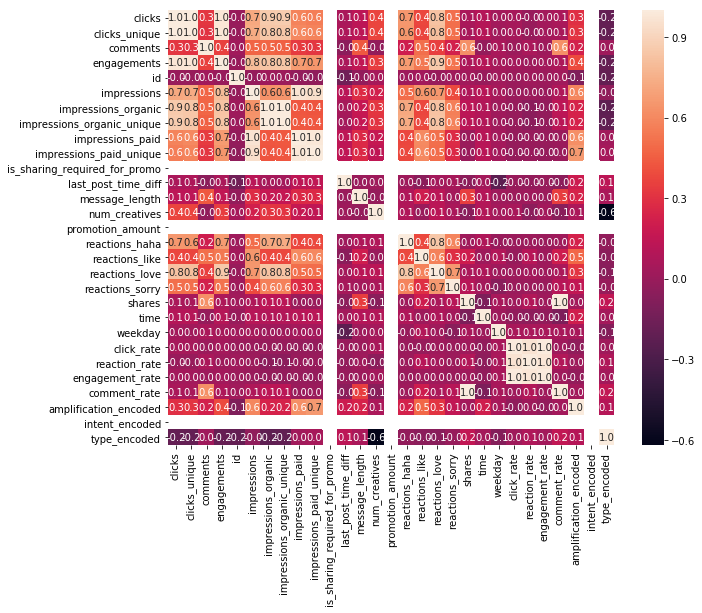

In [24]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#df = ta.df_features[['engag','MsgSize','Noun','Adj','Verb']]
df.info()

fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.1f')